# Adding libraries

In [643]:
# Data 
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Function import
from method import evaluation_metric, standardize_features, encode_class, find_best_k, remove_outliers

# An overview of the dataset

In [644]:
base_url = "C:/Users/M E L S A/Desktop/M E L S A/raisin/data/"
raisin_dataset_url = base_url + "raisin.csv"

In [645]:
df = pd.read_csv(raisin_dataset_url) #url yi oku ve DataFrame objesine ata
df.head(5)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


+ 1 - Area (Alan): Üzüm sınırları içindeki piksel sayısını verir
+ 2 - MajorAxisLength (Büyük Eksen Uzunluğu): Üzüm üzerine çizilebilecek en uzun çizgi olan ana ekseni uzunluğunu verir
+ 3 - MinorAxisLength (Küçük Eksen Uzunluğu): Üzüm üzerine çizilebilecek en kısa çizgi olan küçük ekseni uzunluğunu verir
+ 4 - Eccentricity (Eksantriklik): Aynı momentlere sahip olan elipsin eksantrikliğini ölçer
+ 5 - ConvexArea (Konveks Alan): Üzüm tarafından oluşturulan bölgenin en küçük konveks kabuğundaki piksel sayısını verir
+ 6 - Extent (Yayılım): Üzüm tarafından oluşturulan bölgenin sınırlayıcı kutudaki toplam piksellere oranını verir
+ 7 - Perimeter (Çevre): Üzüm sınırları ve etrafındaki pikseller arasındaki mesafeyi hesaplayarak çevreyi ölçer
+ 8 - Class (Sınıf): Keçimen ve Besni üzümü

Bir elips için eksantriklik, şeklin mükemmel bir daire olmaktan ne kadar sapkın olduğunu ölçen boyutsuz bir parametredir. Eksantriklik değeri 0 ile 1 arasında değişir.

- Eksantriklik 0 ise, elips mükemmel bir dairedir.
- Eksantriklik 1'e yaklaştıkça, elips daha uzun ve "düzleşmiş" hale gelir, ince bir oval şekline benzer.
- Eksantriklik tam olarak 1 ise, şekil bir paraboladır. 
- Eksantriklik 1'den büyükse, şekil bir hiperbol olur.

In [646]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [647]:
# DataFrame'deki belirli sütunları float tipine dönüştürme
df['ConvexArea'] = df['ConvexArea'].astype(float)
df['Area'] = df['Area'].astype(float)

In [648]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    float64
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    float64
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(7), object(1)
memory usage: 56.4+ KB


In [649]:
df.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000


In [650]:
df.isnull().sum() # eksik verinin kolon bazında saydırılması

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

# Data visualization

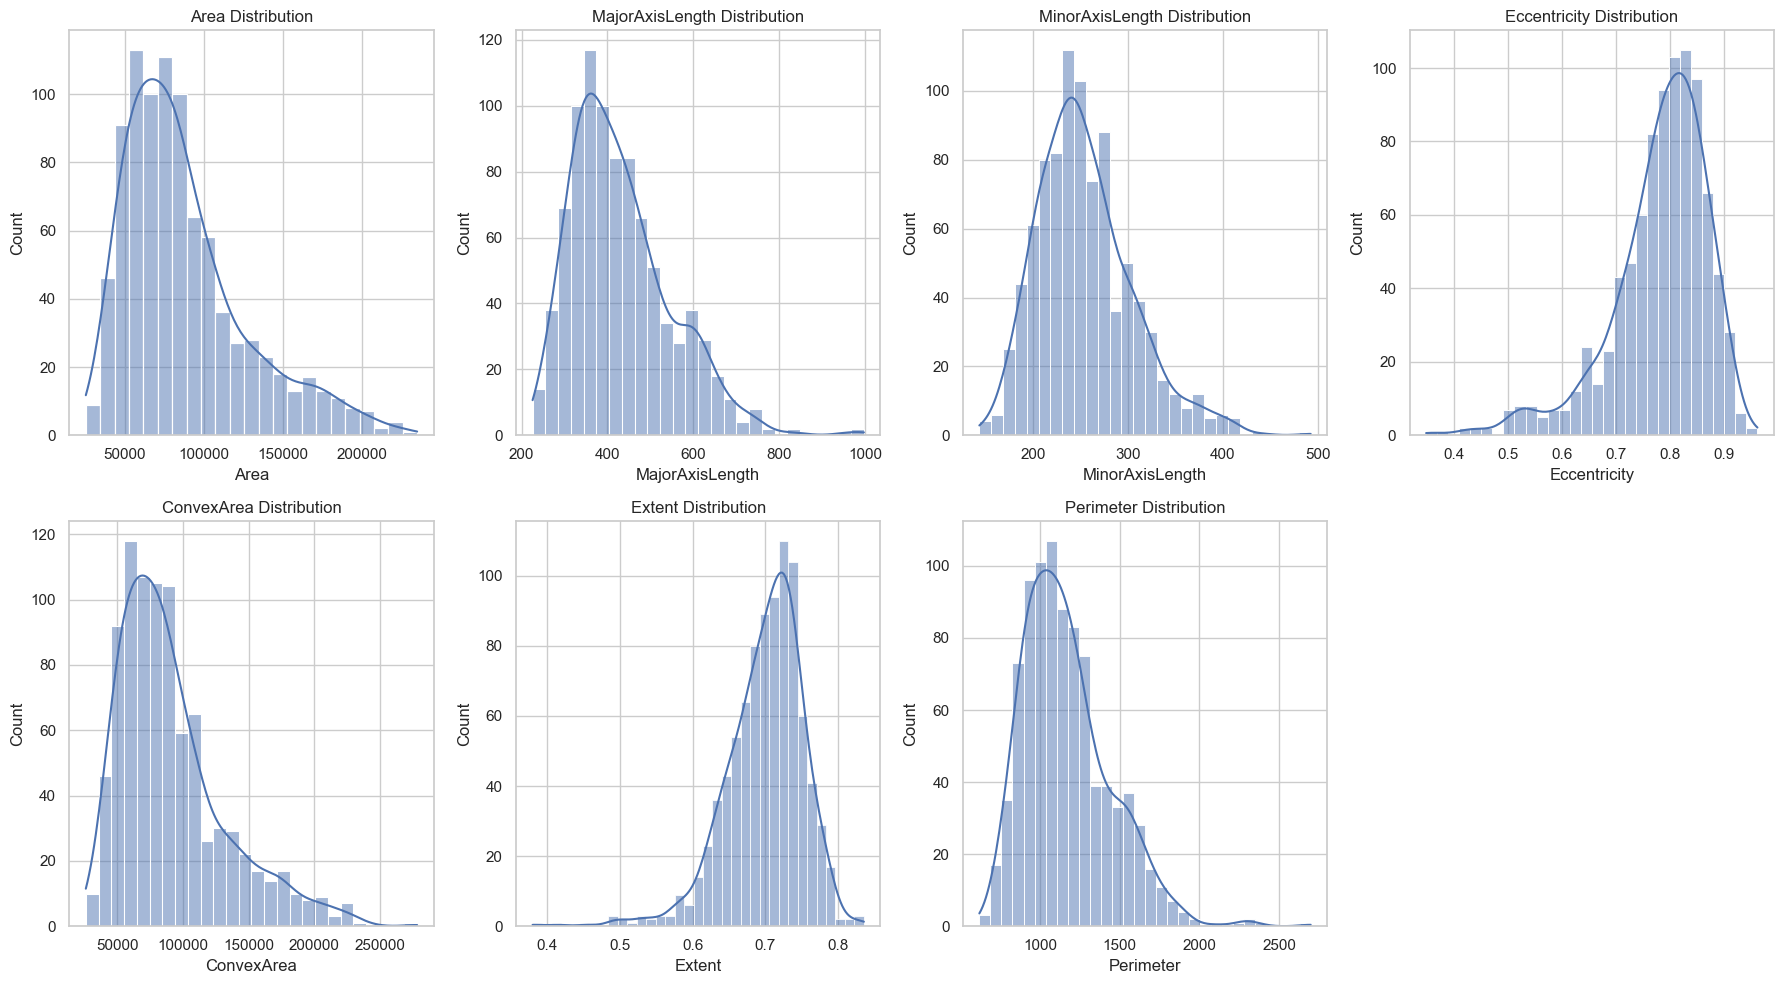

In [651]:
# Tüm histogramları tek bir ekranda gösterme
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 10))

sns.histplot(data=df, x='Area', kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Area Distribution', fontsize=12)

sns.histplot(data=df, x='MajorAxisLength', kde=True, ax=axes[0, 1])
axes[0, 1].set_title('MajorAxisLength Distribution', fontsize=12)

sns.histplot(data=df, x='MinorAxisLength', kde=True, ax=axes[0, 2])
axes[0, 2].set_title('MinorAxisLength Distribution', fontsize=12)

sns.histplot(data=df, x='Eccentricity', kde=True, ax=axes[0, 3])
axes[0, 3].set_title('Eccentricity Distribution', fontsize=12)

sns.histplot(data=df, x='ConvexArea', kde=True, ax=axes[1, 0])
axes[1, 0].set_title('ConvexArea Distribution', fontsize=12)

sns.histplot(data=df, x='Extent', kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Extent Distribution', fontsize=12)

sns.histplot(data=df, x='Perimeter', kde=True, ax=axes[1, 2])
axes[1, 2].set_title('Perimeter Distribution', fontsize=12)

# En sonuncu sütunun boş olmasını sağlama
axes[1, 3].axis('off')

# Boş alanları kaldırma
fig.tight_layout()

# Pencereyi gösterme
plt.show()


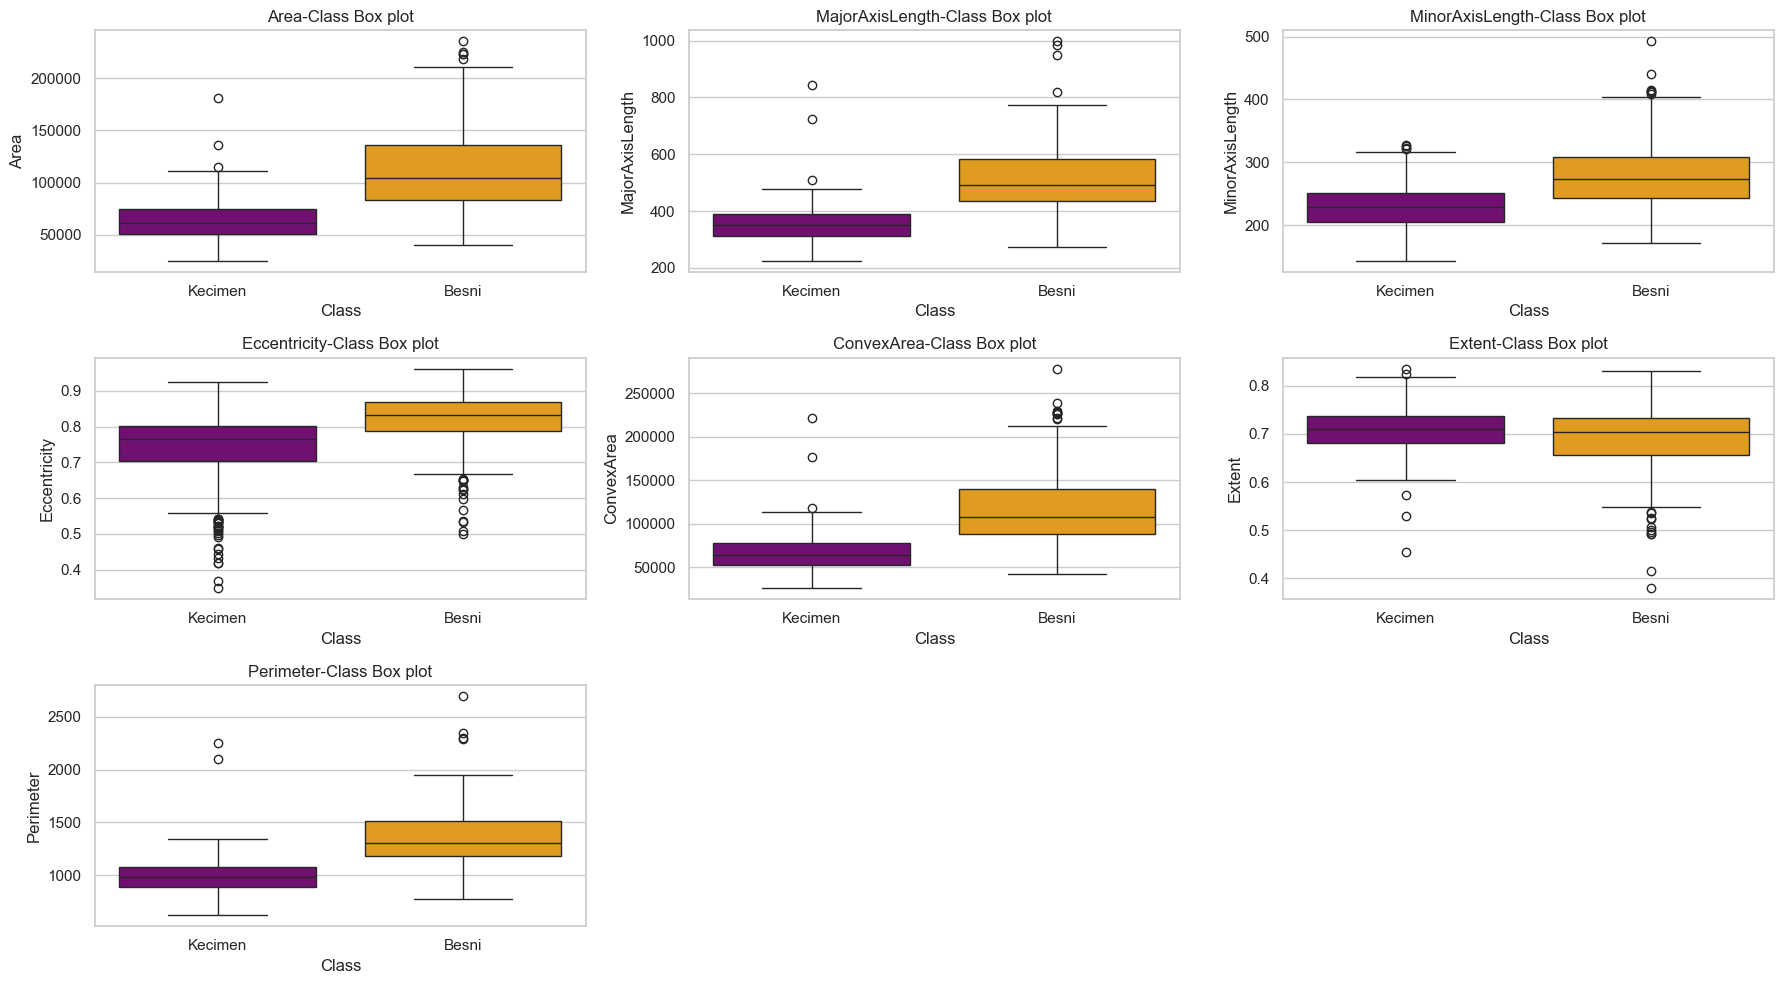

In [652]:
# Tüm box plotları tek bir ekranda gösterme
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 10))

# Area-Class Box plot
sns.boxplot(data=df, x='Class', y='Area',  hue='Class', palette=['purple', 'orange'], ax=axes[0, 0])
axes[0, 0].set_title('Area-Class Box plot', fontsize=12)

# MajorAxisLength-Class Box plot
sns.boxplot(data=df, x='Class', y='MajorAxisLength',  hue='Class', palette=['purple', 'orange'], ax=axes[0, 1])
axes[0, 1].set_title('MajorAxisLength-Class Box plot', fontsize=12)

# MinorAxisLength-Class Box plot
sns.boxplot(data=df, x='Class', y='MinorAxisLength',  hue='Class', palette=['purple', 'orange'], ax=axes[0, 2])
axes[0, 2].set_title('MinorAxisLength-Class Box plot', fontsize=12)

# Eccentricity-Class Box plot
sns.boxplot(data=df, x='Class', y='Eccentricity',  hue='Class', palette=['purple', 'orange'], ax=axes[1, 0])
axes[1, 0].set_title('Eccentricity-Class Box plot', fontsize=12)

# ConvexArea-Class Box plot
sns.boxplot(data=df, x='Class', y='ConvexArea',  hue='Class', palette=['purple', 'orange'], ax=axes[1, 1])
axes[1, 1].set_title('ConvexArea-Class Box plot', fontsize=12)

# Extent-Class Box plot
sns.boxplot(data=df, x='Class', y='Extent',  hue='Class', palette=['purple', 'orange'], ax=axes[1, 2])
axes[1, 2].set_title('Extent-Class Box plot', fontsize=12)

# Perimeter-Class Box plot
sns.boxplot(data=df, x='Class', y='Perimeter',  hue='Class', palette=['purple', 'orange'], ax=axes[2, 0])
axes[2, 0].set_title('Perimeter-Class Box plot', fontsize=12)

# En sonuncu sütunun boş olmasını sağlama
axes[2, 1].axis('off')
axes[2, 2].axis('off')

# Boş alanları kaldırma
fig.tight_layout()

# Pencereyi gösterme
plt.show()


##### Keçimen ve Besni'nin Box Plot örneğini incelediğimde çıkan sonuçlar:
- Kecimen ve Besni'nin ortasındaki çizgi medyan değerini verir ve bir kutu grafiğinin medyan çizgisi, diğer bir kutu grafiğinin kutusunun dışındaysa, iki grup arasında bir fark olduğu yorumu yapılabilir
- Kutu ne kadar uzun olursa veri o kadar dağılmış olur. Kutu ne kadar küçük olursa veri o kadar az dağılmış olur. Bu noktada örneğin Area özelliği için konuşacak olursak; Kecimen'in kutu uzunluğu küçük iken Besni'nin büyüktür bu da bize Besni'nin daha dağılmış bir veri olduğunu gösterir
- Her iki tür de aykırı değer (outlier) içeriyor

<Axes: xlabel='Perimeter', ylabel='Count'>

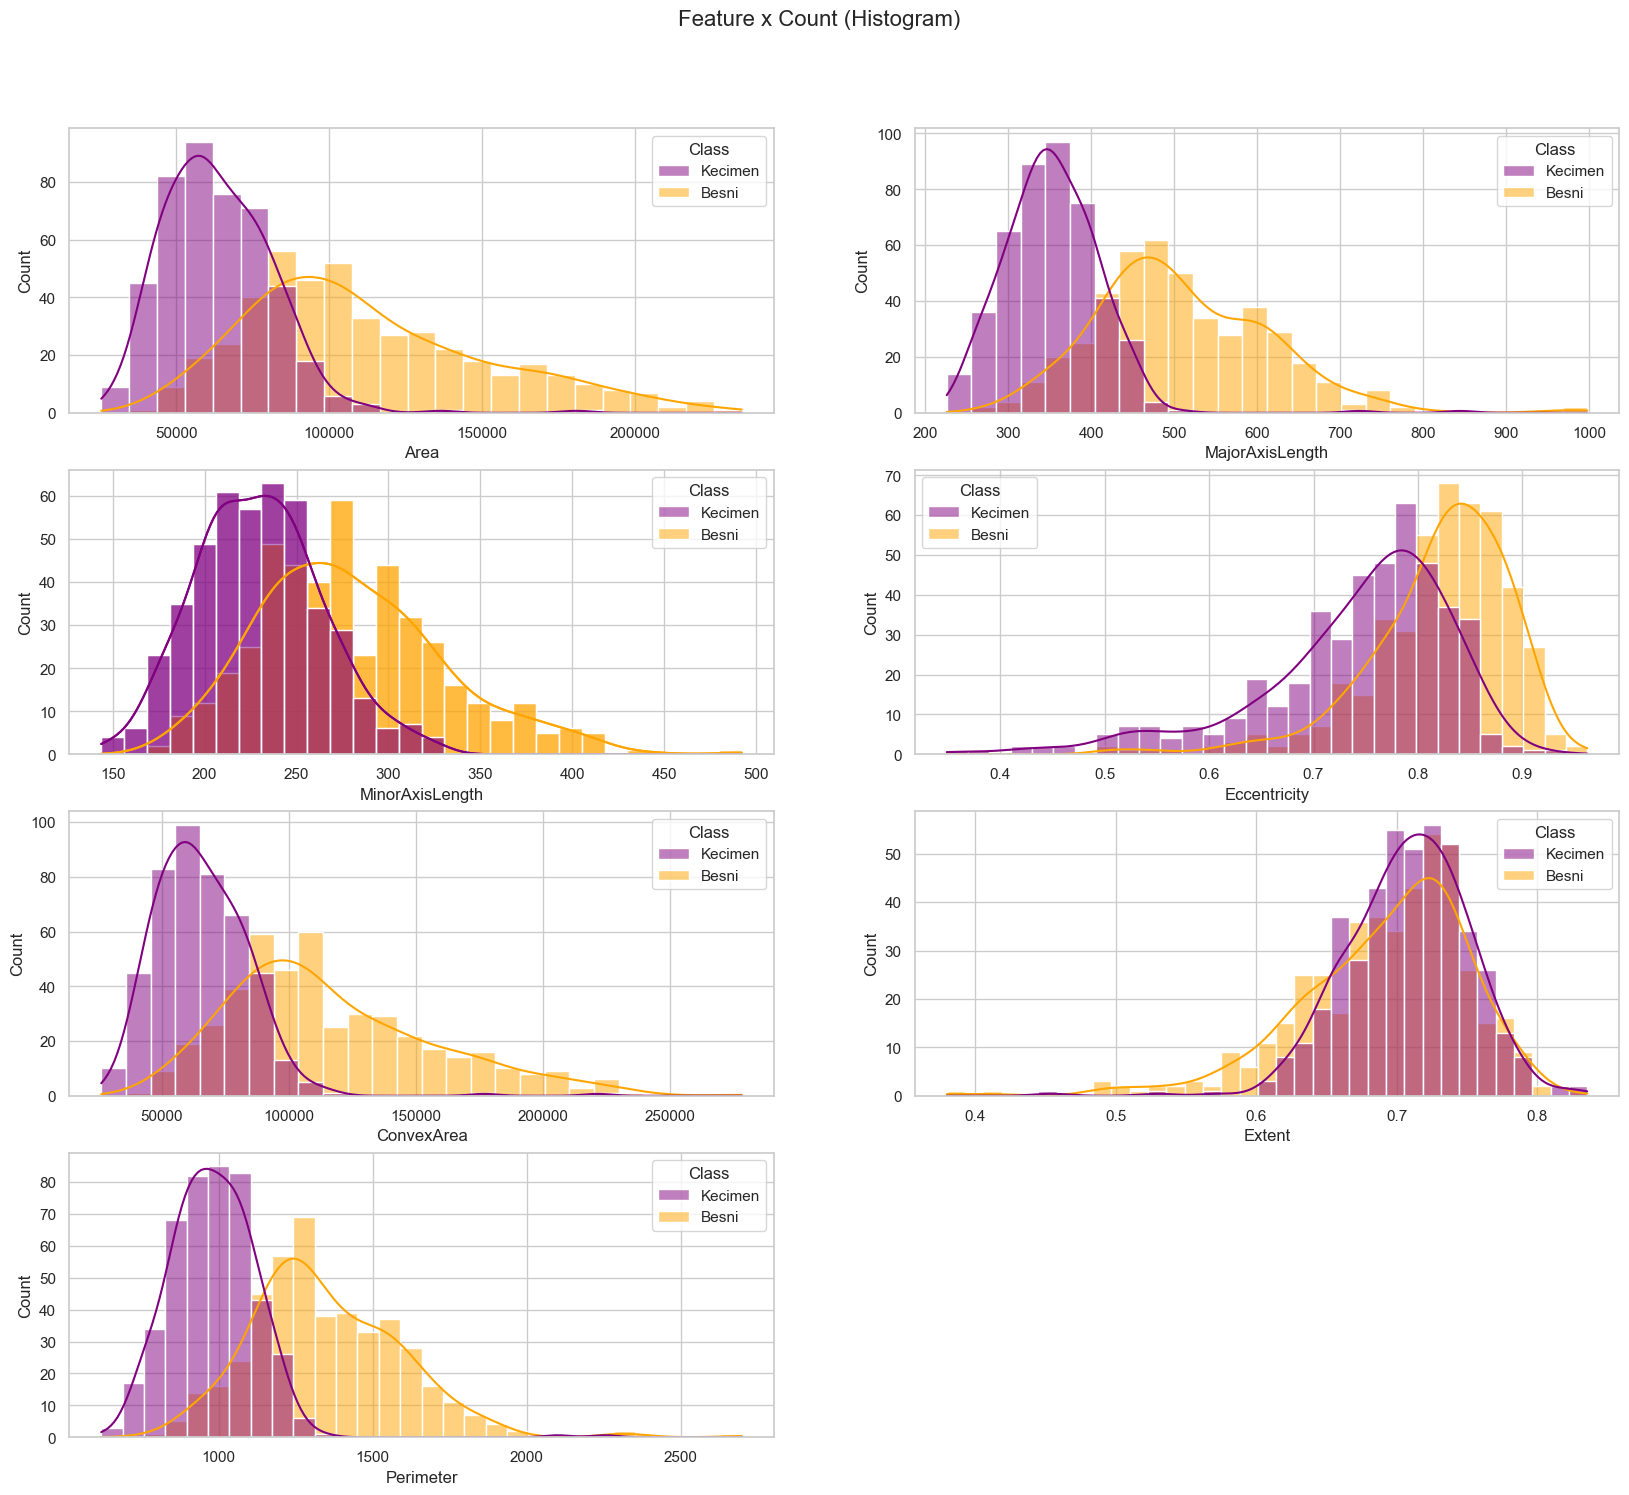

In [653]:
area = plt.figure(figsize=(20,17))

g1 = area.add_subplot(4,2,1) # add_subplot(satır, sütun, konum)
g2 = area.add_subplot(4,2,2)
g3 = area.add_subplot(4,2,3)
g4 = area.add_subplot(4,2,4)
g5 = area.add_subplot(4,2,5)
g6 = area.add_subplot(4,2,6)
g7 = area.add_subplot(4,2,7)

area.suptitle('Feature x Count (Histogram)', fontsize = 16, y = 0.95)
sns.histplot(data = df, x = 'Area', hue = 'Class', ax=g1, kde=True, palette=['purple', 'orange'])
sns.histplot(data = df, x = 'MajorAxisLength', hue = 'Class', ax=g2, kde=True, palette=['purple', 'orange'])
sns.histplot(data = df, x = 'MinorAxisLength', hue = 'Class', ax=g3, kde=True, palette=['purple', 'orange'])
sns.histplot(data = df, x = 'MinorAxisLength', hue = 'Class', ax=g3, kde=True, palette=['purple', 'orange'])
sns.histplot(data = df, x = 'Eccentricity', hue = 'Class', ax=g4, kde=True, palette=['purple', 'orange'])
sns.histplot(data = df, x = 'ConvexArea', hue = 'Class', ax=g5, kde=True, palette=['purple', 'orange'])
sns.histplot(data = df, x = 'Extent', hue = 'Class', ax=g6, kde=True, palette=['purple', 'orange'])
sns.histplot(data = df, x = 'Perimeter', hue = 'Class', ax=g7, kde=True, palette=['purple', 'orange'])

##### Yukarıdaki görselleştirmeden anlaşılacağı üzere MinorAxisLength, Extent ve Eccentricity özelliklerinde türlerin ayırt edilmesi daha zor iken diğer özelliklerde biraz daha belirgin bir haldedir.

Class
Kecimen    450
Besni      450
Name: count, dtype: int64

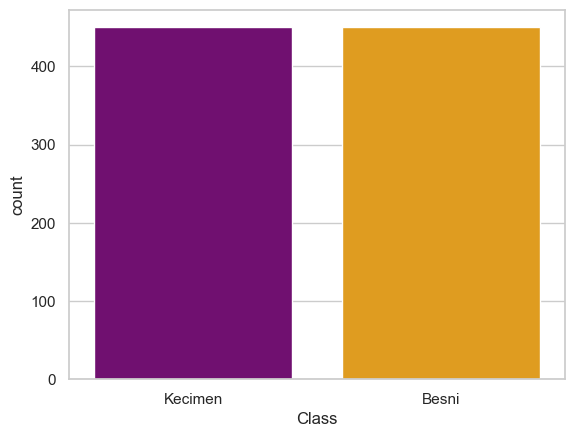

In [654]:
colors = ['purple', 'orange']
sns.countplot(x = "Class", data = df, hue = "Class", palette=colors)
df.loc[:,"Class"].value_counts()

##### Yukarıda görüldüğü üzere her iki türün miktarı da veri setinde aynıdır bu da veri setinin makine öğrenmesi algoritmalarındaki dezavantajların (overfitting gibi) önüne geçen bir niteliktir.

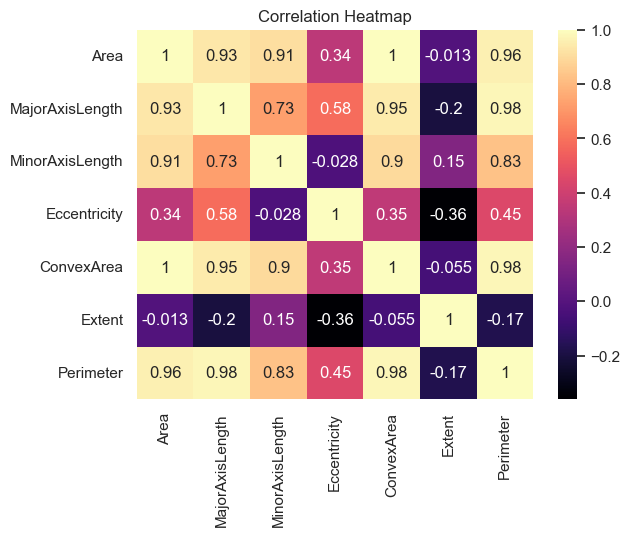

In [655]:
attributes = df.drop('Class', axis='columns')
sns.heatmap(attributes.corr(), annot=True, cmap='magma')
plt.title('Correlation Heatmap')
plt.show()

##### Yukarıdaki görselden örneğin Perimeter özelliğine bakacak olursak; Extent ve Eccentricity dışındaki özellikler ile çok fazla korelasyona sahip olduğunu görebiliyoruz. Bu da ileride değinilecek Çoklu Bağlantı sorununa yol açmaktadır.

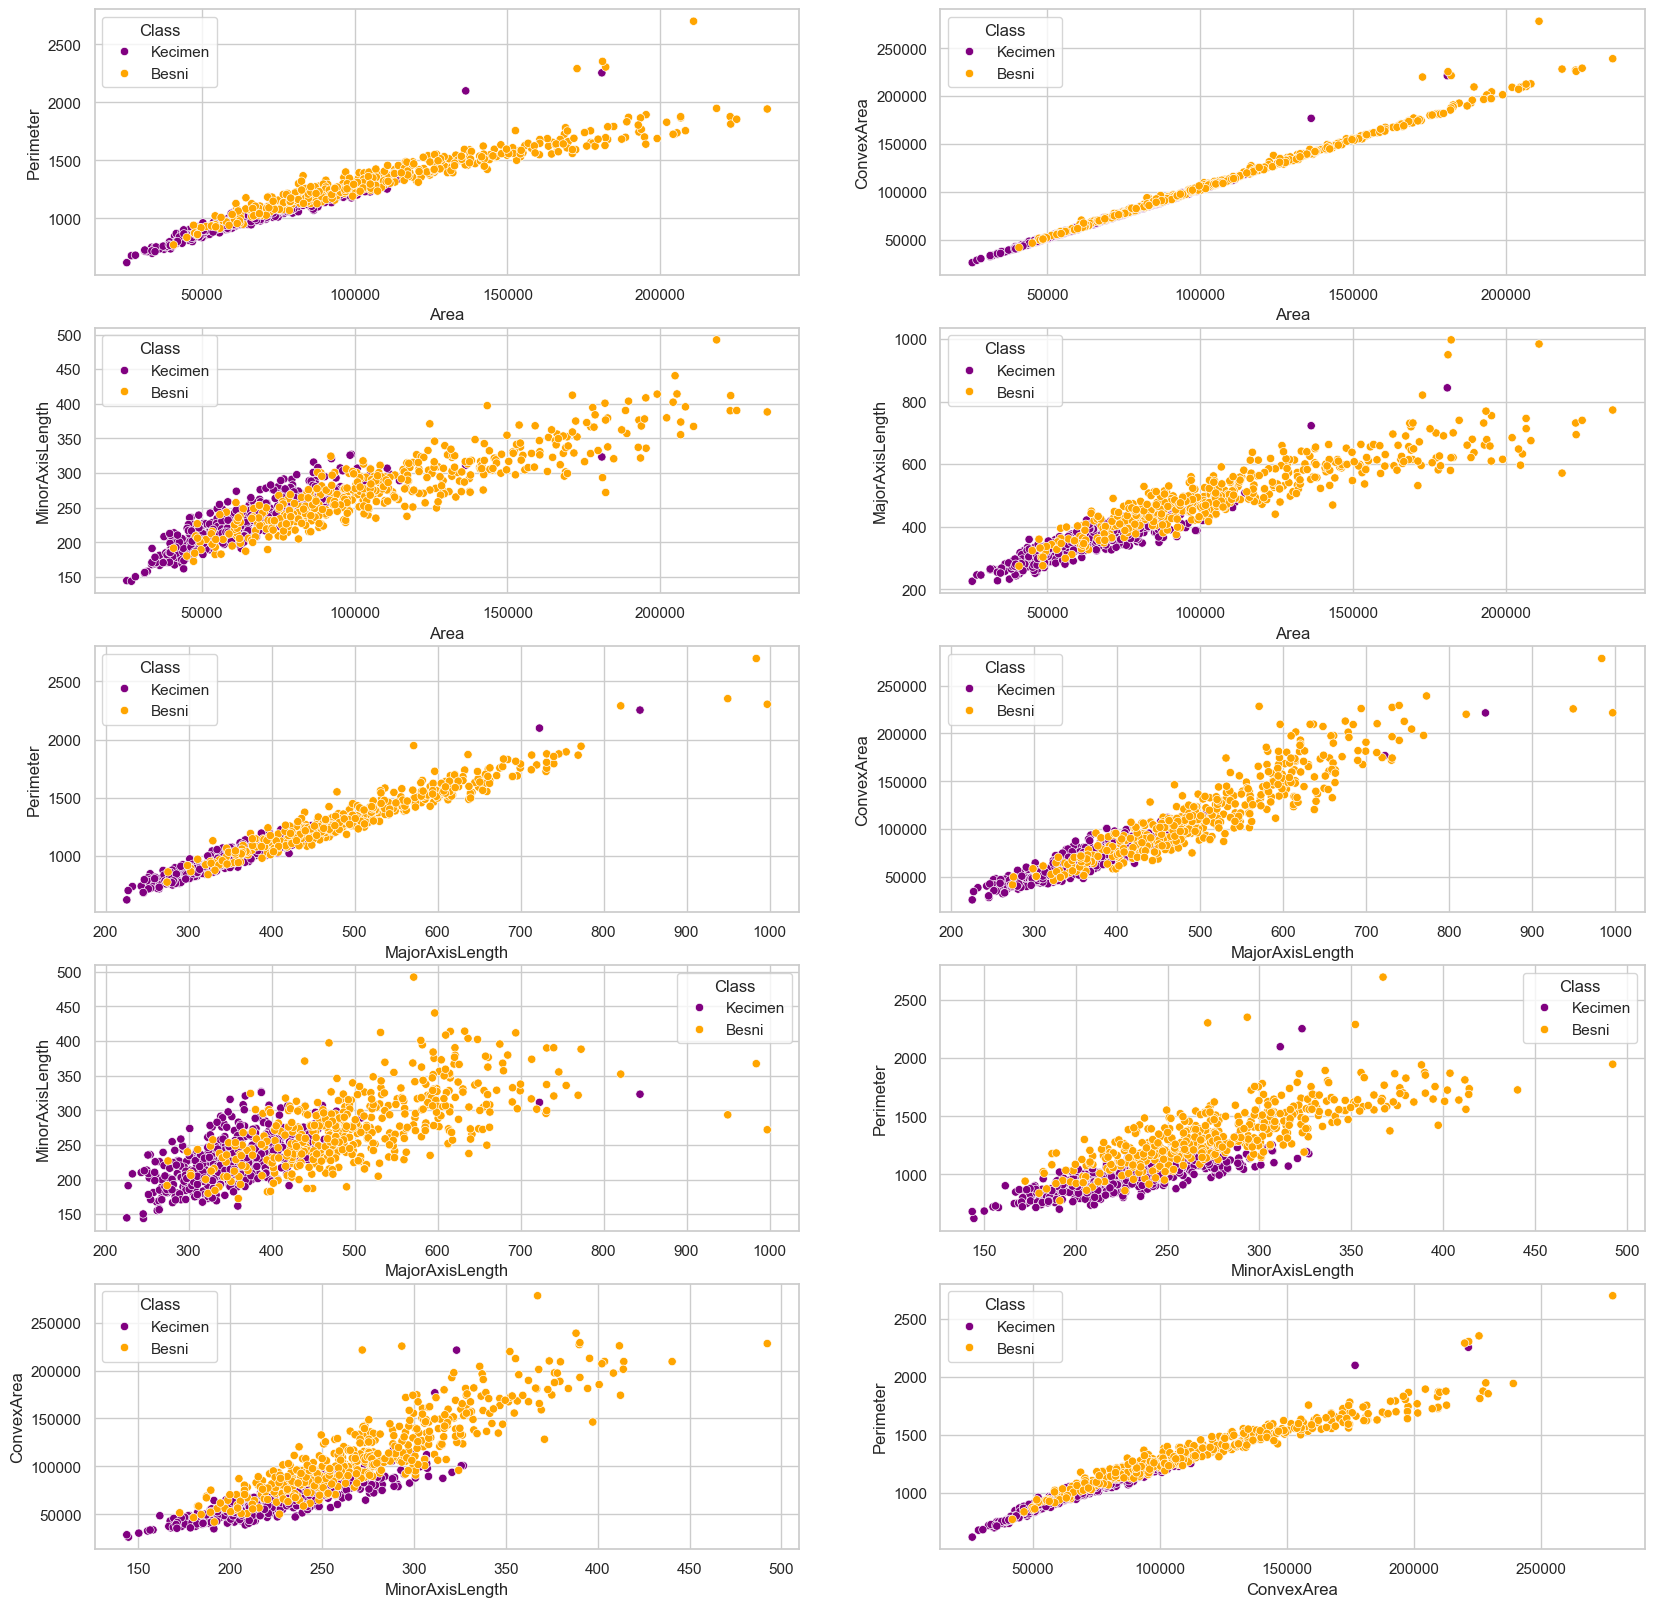

In [656]:
plt.figure(figsize=(20, 20))

plt.subplot(5, 2, 1)
sns.scatterplot(data=df, x='Area', y='Perimeter', hue='Class', palette=['purple', 'orange'])

plt.subplot(5, 2, 2)
sns.scatterplot(data=df, x='Area', y='ConvexArea', hue='Class', palette=['purple', 'orange'])

plt.subplot(5, 2, 3)
sns.scatterplot(data=df, x='Area', y='MinorAxisLength', hue='Class', palette=['purple', 'orange'])

plt.subplot(5, 2, 4)
sns.scatterplot(data=df, x='Area', y='MajorAxisLength', hue='Class', palette=['purple', 'orange'])

plt.subplot(5, 2, 5)
sns.scatterplot(data=df, x='MajorAxisLength', y='Perimeter', hue='Class', palette=['purple', 'orange'])

plt.subplot(5, 2, 6)
sns.scatterplot(data=df, x='MajorAxisLength', y='ConvexArea', hue='Class', palette=['purple', 'orange'])

plt.subplot(5, 2, 7)
sns.scatterplot(data=df, x='MajorAxisLength', y='MinorAxisLength', hue='Class', palette=['purple', 'orange'])

plt.subplot(5, 2, 8)
sns.scatterplot(data=df, x='MinorAxisLength', y='Perimeter', hue='Class', palette=['purple', 'orange'])

plt.subplot(5, 2, 9)
sns.scatterplot(data=df, x='MinorAxisLength', y='ConvexArea', hue='Class', palette=['purple', 'orange'])

plt.subplot(5, 2, 10)
sns.scatterplot(data=df, x='ConvexArea', y='Perimeter', hue='Class', palette=['purple', 'orange'])

plt.show()


##### Yukarıdaki görselden çıkarılacağı üzere özellikler arasında genel olarak logaritmik bir ilişki bulunmkatadır. Kimi örnekler (örn. MinorAxisLength ile MajorAxisLength) daha fazla yayılım gösterirken kimi örnekler (örn. ConvexArea ile Area) ise daha az dağılım göstermiştir.

##### Label Encoder

In [657]:
df_encoded = encode_class(df)
df_encoded

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524.0,442.246011,253.291155,0.819738,90546.0,0.758651,1184.040,1
1,75166.0,406.690687,243.032436,0.801805,78789.0,0.684130,1121.786,1
2,90856.0,442.267048,266.328318,0.798354,93717.0,0.637613,1208.575,1
3,45928.0,286.540559,208.760042,0.684989,47336.0,0.699599,844.162,1
4,79408.0,352.190770,290.827533,0.564011,81463.0,0.792772,1073.251,1
...,...,...,...,...,...,...,...,...
895,83248.0,430.077308,247.838695,0.817263,85839.0,0.668793,1129.072,0
896,87350.0,440.735698,259.293149,0.808629,90899.0,0.636476,1214.252,0
897,99657.0,431.706981,298.837323,0.721684,106264.0,0.741099,1292.828,0
898,93523.0,476.344094,254.176054,0.845739,97653.0,0.658798,1258.548,0


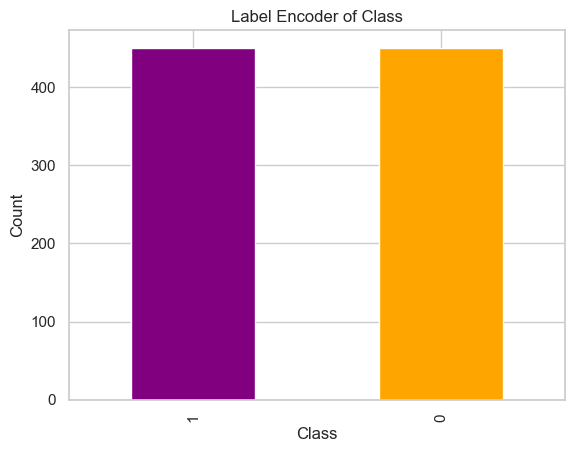

In [658]:
# Class sütununun değer sayısını al
class_counts = df_encoded['Class'].value_counts()

# Bar plot ile görselleştirme
class_counts.plot(kind='bar', color=['purple', 'orange'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Label Encoder of Class')
plt.show()

##### Yukarıdaki görselde görüleceği üzere Keçimen ve Besni türü kuru üzümleri Label Encoder kullanılarak 0 ve 1 değerlerine çekilmiştir. Bu değerler alfabetik önceliğe göre verilmiştir yani Besni ve Keçimen türlerinden "B" harfi daha önce geldiği için 0 değerini alırken "K" harfi daha sonra geldiği için 1 değerini almıştır.

##### Neden OneHotEncoder Kullanılmadı?
- OneHotEncoder genellikle iki değerden daha fazla kategorik veri olduğunda kullanılan bir yöntemdir bir de ben opsiyonel olarak veri setinin iki kolona ayrılmasından ziyade tek bir kolonda kalmasının Regresyon modelini kullanmamda daha yararlı olacağına kanaat getirdim.

# Train - Test Split and Data Pre-Processing (Scaling)

- Yüksek korelasyona karşı dirençli olduğu için "Support Vector Machine"
- Bağımsız değişkenlerin logaritmik ilişkisinden dolayı ayrıca target'ın ikili (binary) bir ifade olması nedeniyle "Logistic Regression"
- Veri noktalarının birbirine yakınlığı nedeniyle "K-Nearest Neighbors"
modelleri tercih edilmiştir.

In [659]:
X = df_encoded.drop(["Class"], axis=1) # Bağımsız değişkenler
y = df_encoded["Class"]  # Bağımlı değişken

##### Remove_outliers fonksiyonunun nasıl oluşturulduğuna dair daha fazla bilgi almak için aşağıdaki siteleri ziyaret edebilirsiniz: 
- https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/
- https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code/

In [660]:
X_clean, y_clean = remove_outliers(X, y)

In [661]:
# Temizlenmiş X ve y'yi DataFrame'e çevir
X_clean_df = pd.DataFrame(X_clean, columns=['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'Extent', 'Perimeter'])

# Temizlenmiş X ve y'yi birleştirerek yeni bir DataFrame oluştur
df_clean = pd.concat([X_clean_df, pd.Series(y_clean, name='Class')], axis=1)
df_clean

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524.0,442.246011,253.291155,0.819738,90546.0,0.758651,1184.040,1
1,75166.0,406.690687,243.032436,0.801805,78789.0,0.684130,1121.786,1
2,90856.0,442.267048,266.328318,0.798354,93717.0,0.637613,1208.575,1
3,45928.0,286.540559,208.760042,0.684989,47336.0,0.699599,844.162,1
4,79408.0,352.190770,290.827533,0.564011,81463.0,0.792772,1073.251,1
...,...,...,...,...,...,...,...,...
895,83248.0,430.077308,247.838695,0.817263,85839.0,0.668793,1129.072,0
896,87350.0,440.735698,259.293149,0.808629,90899.0,0.636476,1214.252,0
897,99657.0,431.706981,298.837323,0.721684,106264.0,0.741099,1292.828,0
898,93523.0,476.344094,254.176054,0.845739,97653.0,0.658798,1258.548,0


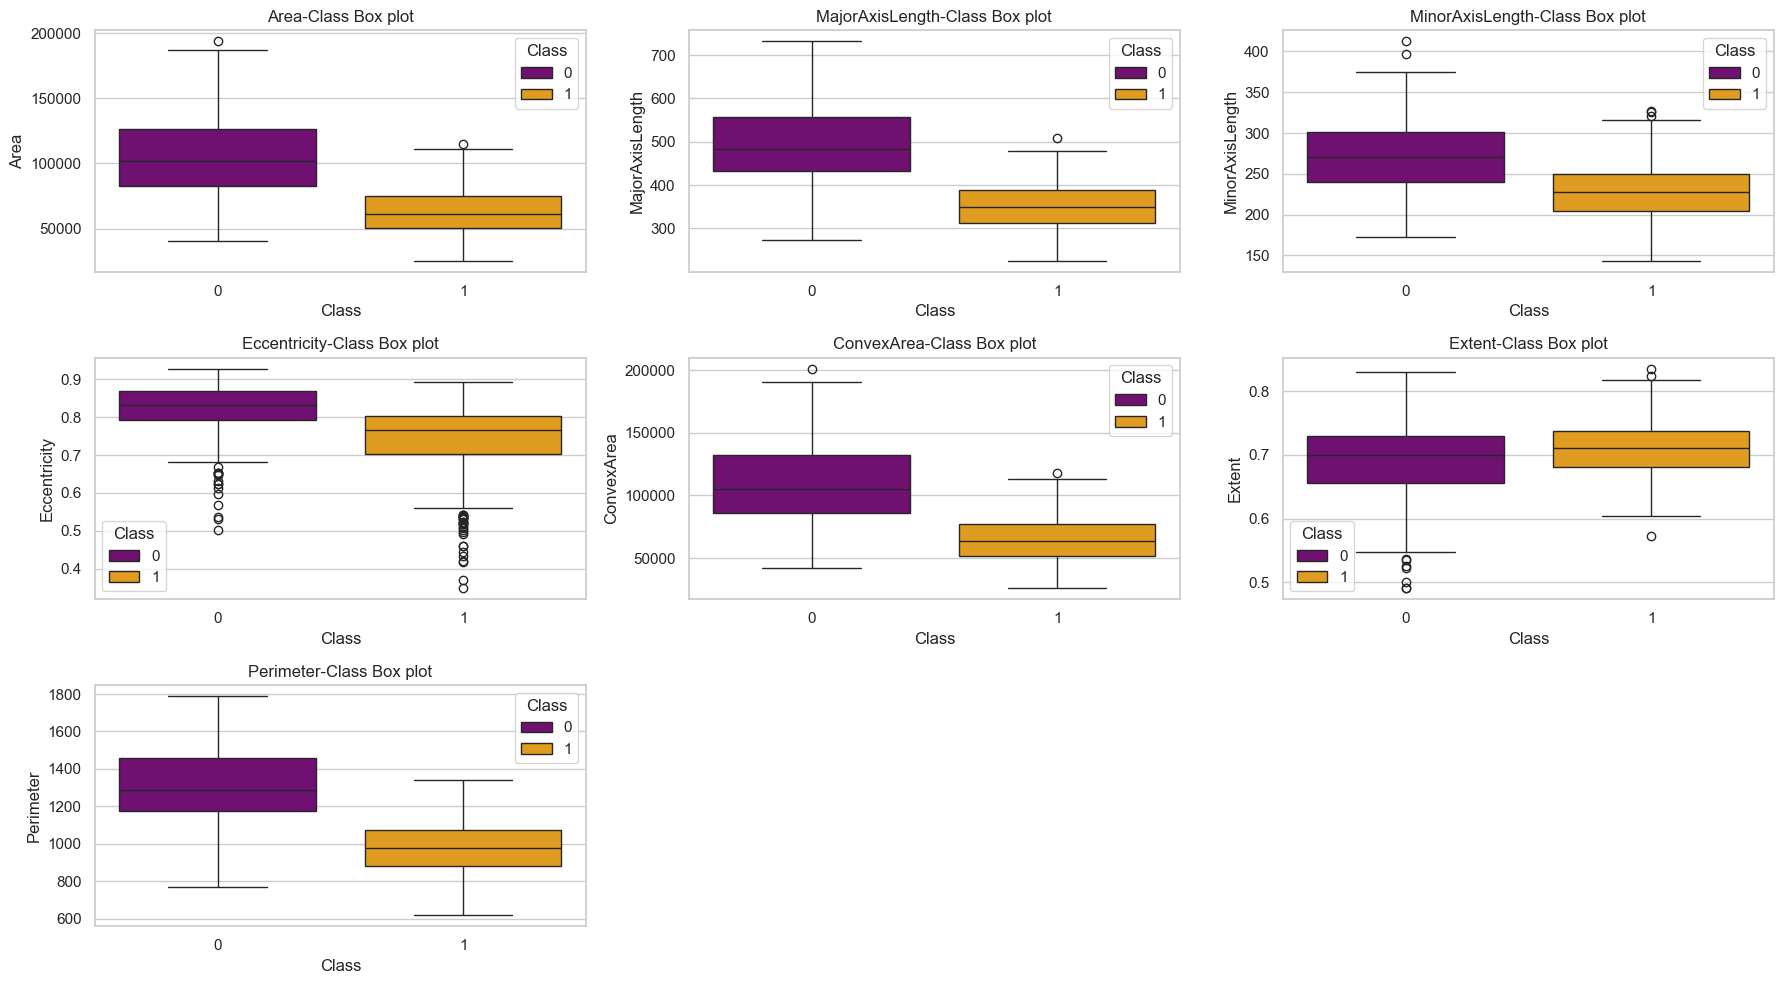

In [662]:
# Tüm box plotları tek bir ekranda gösterme
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 10))

# Area-Class Box plot
sns.boxplot(data=df_clean, x='Class', y='Area',  hue='Class', palette=['purple', 'orange'], ax=axes[0, 0])
axes[0, 0].set_title('Area-Class Box plot', fontsize=12)

# MajorAxisLength-Class Box plot
sns.boxplot(data=df_clean, x='Class', y='MajorAxisLength',  hue='Class', palette=['purple', 'orange'], ax=axes[0, 1])
axes[0, 1].set_title('MajorAxisLength-Class Box plot', fontsize=12)

# MinorAxisLength-Class Box plot
sns.boxplot(data=df_clean, x='Class', y='MinorAxisLength',  hue='Class', palette=['purple', 'orange'], ax=axes[0, 2])
axes[0, 2].set_title('MinorAxisLength-Class Box plot', fontsize=12)

# Eccentricity-Class Box plot
sns.boxplot(data=df_clean, x='Class', y='Eccentricity',  hue='Class', palette=['purple', 'orange'], ax=axes[1, 0])
axes[1, 0].set_title('Eccentricity-Class Box plot', fontsize=12)

# ConvexArea-Class Box plot
sns.boxplot(data=df_clean, x='Class', y='ConvexArea',  hue='Class', palette=['purple', 'orange'], ax=axes[1, 1])
axes[1, 1].set_title('ConvexArea-Class Box plot', fontsize=12)

# Extent-Class Box plot
sns.boxplot(data=df_clean, x='Class', y='Extent',  hue='Class', palette=['purple', 'orange'], ax=axes[1, 2])
axes[1, 2].set_title('Extent-Class Box plot', fontsize=12)

# Perimeter-Class Box plot
sns.boxplot(data=df_clean, x='Class', y='Perimeter',  hue='Class', palette=['purple', 'orange'], ax=axes[2, 0])
axes[2, 0].set_title('Perimeter-Class Box plot', fontsize=12)

# En sonuncu sütunun boş olmasını sağlama
axes[2, 1].axis('off')
axes[2, 2].axis('off')

# Boş alanları kaldırma
fig.tight_layout()

# Pencereyi gösterme
plt.show()

Class
1    448
0    417
Name: count, dtype: int64

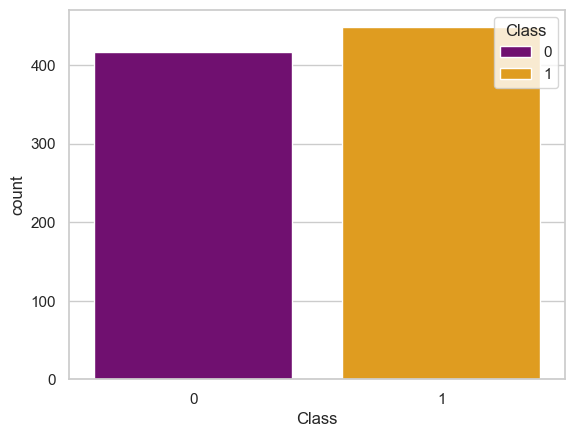

In [663]:
colors = ['purple', 'orange']
sns.countplot(x = "Class", data = df_clean, hue = "Class", palette=colors)
df_clean.loc[:,"Class"].value_counts()

##### Aykırı değerlerin sonucunda görüldüğü üzere aykırı değerlere ağırlıklı olarak Besni türünde rastlanmaktadır (Besni [33/35], Keçimen[2/35]) bu da modelimin tahmin aşamasında aslında işe yarayan niteliğe sahip olabileceğini göstermektedir bu nedenle aykırı değerler silinmeden modellerin oluşturulup test edilmesine karar verilmiştir.

In [664]:
# StandardScaler Function Call
X_sc = standardize_features(X)

In [665]:
# Veriyi eğitim ve test setleri olarak bölme
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.2)

# Model Training and Evaluation

#### Logistic Regression

In [666]:
from sklearn.linear_model import LogisticRegression

# Lojistik Regresyon modeli oluşturma
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [667]:
# Test verisi üzerinde tahmin yapılır
y_pred = logistic_model.predict(X_test)

# Test verisi üzerinde olasılık tahminlerini alınır
y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]

# Tahminleri ve olasılıkları içeren DataFrame oluşturulur
result_df = pd.DataFrame({'Class': y_test, 'Predicted': y_pred, 'Probability': y_pred_proba})

result_df

,Class,Predicted,Probability
419,1,1,0.635434
412,1,1,0.877501
510,0,0,0.263112
203,1,1,0.666156
79,1,1,0.925539
...,...,...,...
450,0,0,0.002436
630,0,0,0.213982
418,1,1,0.716307
729,0,1,0.508968


In [668]:
evaluation_metric(logistic_model, X_train, y_train, X_test, y_test)

Train
[[300  59]
 [ 41 320]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       359
           1       0.84      0.89      0.86       361

    accuracy                           0.86       720
   macro avg       0.86      0.86      0.86       720
weighted avg       0.86      0.86      0.86       720


Test
[[76 15]
 [ 6 83]]
              precision    recall  f1-score   support

           0       0.93      0.84      0.88        91
           1       0.85      0.93      0.89        89

    accuracy                           0.88       180
   macro avg       0.89      0.88      0.88       180
weighted avg       0.89      0.88      0.88       180



##### VIF

##### Aşağıdaki sonuçlardan anlaşılıyor ki bağımsız değişkenler arasında yüksek çoklu bağlantı (Multicollinearity) sorunu vardır ancak benim verisetimde "kuru üzümü bulmada en büyük katkıyı sağlayan kolon ..." gibi bir arayış olmadığı için (feauturelerin katsayıları ile ilgilenmiyorum) tamamen prediction üzerine olduğu için şimdilik modellerimi etkileyecek bir sorun değildir. Ayrıca feuture'lerim yapısaldır yani biri diğerinden türetilmemiştir.

##### Daha fazla bilgi için siteyi ziyaret edebilirsiniz: https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/

##### Çoklu Doğrusallığın modeller üzerine etkisi hakkında bilgi almak için blog yazısını ziyaret edebilirsiniz: https://medium.com/@raj5287/effects-of-multi-collinearity-in-logistic-regression-svm-rf-af6766d91f1b#:~:text=Linear%20Kernel%20of%20Support%20vector,vectors%20directly%20for%20feature%20importance.

In [669]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Varyans Enflasyon Faktörü - Multicollinearity
vif = pd.DataFrame()
vif["feature"] = X_sc.columns
vif["VIF"] = [variance_inflation_factor(X_sc.values, i)
                          for i in range(len(X_sc.columns))]
 
print(vif)

           feature         VIF
0             Area  404.718824
1  MajorAxisLength  129.152882
2  MinorAxisLength   40.166637
3     Eccentricity    5.210356
4       ConvexArea  445.947568
5           Extent    1.605335
6        Perimeter  184.252844


##### Cross Validation

##### Daha sonra aynı feuture'lere sahip farklı bir veriseti üzerinde bir test yapıldığı zaman performansı beklediğimizden daha düşük çıkabilir bu durumun önüne geçip asıl performansımızın kaç olduğunu kendimiz hesaplayarak aşağı yukarı performansımızın kaç olacağını görebiliriz. Bu nedenle cross validation ile veriseti k gruba ayrılır ve her grup için aşağıdakiler uygulanır: 
- Seçilen grup validasyon seti olarak kullanılır.
- Diğer tüm gruplar (k-1 grup) train seti olarak kullanılır.
- Train seti kullanılarak model kurulur ve validasyon seti ile değerlendirilir.
- Modelin değerlendirme puanı bir listede saklanır.
##### Daha sonrasında ise modelin değerlendirme puanlarının istatistiklerine (mean) bakılır.

##### Neden cv = 10 seçildi? 
- cv = 5 seçilseydi veriseti beş parçaya bölünecek ve her bir eğitim-test bölünmesi için modelin performansı değerlendirilecekti ancak c = 10 seçildiği zaman veri seti on parçaya bölünecek ve daha fazla eğitim-test bölünmesi yapılacaktır. Bu, daha güvenilir performans değerlendirmeleri sağlayabilir, ancak işlem süresini biraz artırabilir.

##### Cross Validation hakkında daha fazla bilgi için siteyi ziyaret edebiliriniz: https://medium.com/bili%C5%9Fim-hareketi/cross-validation-nedir-nas%C4%B1l-%C3%A7al%C4%B1%C5%9F%C4%B1r-4ec4736e5142

In [670]:
from sklearn.model_selection import cross_validate
model = LogisticRegression()

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision_weighted','recall_weighted','f1_weighted'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]  # ilk iki index, fit_time ve score_time'dır bunların cross validaiton için bir önemi yok

test_accuracy              0.861111
test_precision_weighted    0.861978
test_recall_weighted       0.861111
test_f1_weighted           0.861016
dtype: float64

##### GridSearchCV

#####  GridSearchCV, belirli bir hiperparametre aralığı içinde kombinasyonlar deneyerek, veri kümesine en iyi uyan hiperparametre setini bulmayı amaçlar.

##### Peki modelim ilk çalıştırıldığında %89 accurucy performansı gösterdi ve sonra gridsearchcv kullanıp tekrardan accurucy'e baktığımda %89 sonucunu gördüm yani modelimin herhangi bir parametre optimizasyonu yapmadan aynı performans yükseliğine sahip olması olası bir durum mudur bunu nasıl yorumlayabiliriz? 

- Scikit-learn'deki bazı algoritmalar, varsayılan parametre değerleri ile genellikle iyi performans gösterir. Eğer modelin varsayılan parametreleri zaten uygun bir şekilde ayarlıysa, GridSearchCV bu durumda büyük bir performans artışı sağlamayabilir.

##### Hiperparemetre Optimizasyonu hakkında daha fazla bilgi için siteyi ziyaret edebilirsiniz: https://medium.com/bili%C5%9Fim-hareketi/hiperparametre-optimizasyonu-9ba0e7f32e6f

In [671]:
from sklearn.model_selection import GridSearchCV

# Logistic Regression modelini oluşturun
logistic_model = LogisticRegression()

# GridSearchCV için parametrelerin belirlenmesi
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# GridSearchCV objesini oluşturun
grid_model = GridSearchCV(logistic_model, param_grid, scoring='accuracy', cv=10)

# GridSearchCV'yi eğitim verisi üzerinde uygulama
grid_model.fit(X_train, y_train)
y_pred_logistic = grid_model.predict(X_test)

# En iyi parametre setini bulma
best_params = grid_model.best_params_
print("En iyi parametreler:", best_params)

# En iyi modeli elde etme
best_model = grid_model.best_estimator_

# Test seti üzerinde modeli değerlendirme
accuracy = best_model.score(X_test, y_test)
print("Test seti doğruluk oranı:", accuracy)


En iyi parametreler: {'C': 0.1}
Test seti doğruluk oranı: 0.8833333333333333


#### KNN

In [672]:
from sklearn.neighbors import KNeighborsClassifier

##### The best k value with my function

In [673]:
# En iyi k değerini bulma
best_k_value = find_best_k(X_train, y_train)
print(f"En iyi k değeri: {best_k_value}")

En iyi k değeri: 13


In [674]:
knn_model_n = KNeighborsClassifier(n_neighbors=best_k_value)
knn_model_n.fit(X_train,y_train) 

KNeighborsClassifier(n_neighbors=13)

In [675]:
evaluation_metric(knn_model_n, X_train, y_train, X_test, y_test)

Train
[[293  66]
 [ 27 334]]
              precision    recall  f1-score   support

           0       0.92      0.82      0.86       359
           1       0.83      0.93      0.88       361

    accuracy                           0.87       720
   macro avg       0.88      0.87      0.87       720
weighted avg       0.88      0.87      0.87       720


Test
[[70 21]
 [ 7 82]]
              precision    recall  f1-score   support

           0       0.91      0.77      0.83        91
           1       0.80      0.92      0.85        89

    accuracy                           0.84       180
   macro avg       0.85      0.85      0.84       180
weighted avg       0.85      0.84      0.84       180



In [676]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [677]:
# Test verisi üzerinde tahmin yapılır
y_pred = knn_model.predict(X_test)

# Test verisi üzerinde olasılık tahminlerini alınır
y_pred_proba = knn_model.predict_proba(X_test)[:, 1]

# Tahminleri ve olasılıkları içeren DataFrame oluşturulur
result_df = pd.DataFrame({'Class': y_test, 'Predicted': y_pred, 'Probability': y_pred_proba})

result_df

,Class,Predicted,Probability
419,1,1,0.6
412,1,1,1.0
510,0,0,0.0
203,1,1,1.0
79,1,1,0.8
...,...,...,...
450,0,0,0.0
630,0,0,0.2
418,1,1,1.0
729,0,1,0.8


In [678]:
evaluation_metric(knn_model, X_train, y_train, X_test, y_test)

Train
[[305  54]
 [ 32 329]]
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       359
           1       0.86      0.91      0.88       361

    accuracy                           0.88       720
   macro avg       0.88      0.88      0.88       720
weighted avg       0.88      0.88      0.88       720


Test
[[70 21]
 [ 5 84]]
              precision    recall  f1-score   support

           0       0.93      0.77      0.84        91
           1       0.80      0.94      0.87        89

    accuracy                           0.86       180
   macro avg       0.87      0.86      0.85       180
weighted avg       0.87      0.86      0.85       180



##### Cross Validation

In [679]:
model = KNeighborsClassifier(n_neighbors=11)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision_weighted','recall_weighted',
                                                                   'f1_weighted'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy              0.858333
test_precision_weighted    0.862615
test_recall_weighted       0.858333
test_f1_weighted           0.857889
dtype: float64

##### Finding the best neighbors value with GridSearchCV

In [680]:
knn_values = {"n_neighbors": np.arange(1,30,1)}

In [681]:
knn = KNeighborsClassifier()

In [682]:
knn_cv_model = GridSearchCV(knn, knn_values, cv = 10)

In [683]:
knn_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [684]:
n = knn_cv_model.best_params_
best = n["n_neighbors"]
best

22

In [685]:
model = KNeighborsClassifier(n_neighbors=best)

In [686]:
model_knn = model.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)

In [687]:
evaluation_metric(model_knn, X_train, y_train, X_test, y_test)

Train
[[294  65]
 [ 33 328]]
              precision    recall  f1-score   support

           0       0.90      0.82      0.86       359
           1       0.83      0.91      0.87       361

    accuracy                           0.86       720
   macro avg       0.87      0.86      0.86       720
weighted avg       0.87      0.86      0.86       720


Test
[[74 17]
 [ 7 82]]
              precision    recall  f1-score   support

           0       0.91      0.81      0.86        91
           1       0.83      0.92      0.87        89

    accuracy                           0.87       180
   macro avg       0.87      0.87      0.87       180
weighted avg       0.87      0.87      0.87       180



# SVC

In [688]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [689]:
from sklearn import svm
model_svm = svm.SVC()
model_svm.fit(X_train, y_train)

SVC()

In [690]:
y_pred = model_svm.predict(X_test)

In [691]:
evaluation_metric(model_svm, X_train, y_train, X_test, y_test)

Train
[[293  66]
 [ 31 330]]
              precision    recall  f1-score   support

           0       0.90      0.82      0.86       359
           1       0.83      0.91      0.87       361

    accuracy                           0.87       720
   macro avg       0.87      0.87      0.86       720
weighted avg       0.87      0.87      0.86       720


Test
[[73 18]
 [ 5 84]]
              precision    recall  f1-score   support

           0       0.94      0.80      0.86        91
           1       0.82      0.94      0.88        89

    accuracy                           0.87       180
   macro avg       0.88      0.87      0.87       180
weighted avg       0.88      0.87      0.87       180



##### Cross Validation

In [692]:
model_svm_cv = SVC()

scores = cross_validate(model_svm_cv, X_train, y_train, scoring = ['accuracy', 'precision_weighted','recall_weighted',
                                                                   'f1_weighted'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy              0.858333
test_precision_weighted    0.861757
test_recall_weighted       0.858333
test_f1_weighted           0.857952
dtype: float64

##### Finding the best hiperparameters with GridSearchCV

In [693]:
# SVM modeli için hiperparametre aralıkları
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'gamma': ['scale', 'auto']}

In [694]:
# SVM modeli oluşturulur
svm_model = SVC()

# GridSearchCV kullanarak en iyi hiperparametreler bulunur
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='accuracy')

In [695]:
# En iyi hiperparametreler yazdırılır
best_params = grid_search.best_params_
print(f"En iyi hiperparametreler: {best_params}")

En iyi hiperparametreler: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}


In [696]:
# En iyi hiperparametreler ile SVM modeli oluşturulur ve eğitilir
best_svm_model = SVC(C=best_params['C'], kernel=best_params['kernel'], gamma=best_params['gamma'])
best_svm_model.fit(X_train, y_train)

# Test verisi üzerinde tahmin yapılır
y_pred_svm = best_svm_model.predict(X_test)

In [697]:
evaluation_metric(best_svm_model, X_train, y_train, X_test, y_test)

Train
[[297  62]
 [ 38 323]]
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       359
           1       0.84      0.89      0.87       361

    accuracy                           0.86       720
   macro avg       0.86      0.86      0.86       720
weighted avg       0.86      0.86      0.86       720


Test
[[75 16]
 [ 6 83]]
              precision    recall  f1-score   support

           0       0.93      0.82      0.87        91
           1       0.84      0.93      0.88        89

    accuracy                           0.88       180
   macro avg       0.88      0.88      0.88       180
weighted avg       0.88      0.88      0.88       180



# Models Comparing

##### Comparing machine learning models

In [698]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Modellerin isimleri
model_names = ['LR', 'KNN', 'SVM']

# Sonuçları içeren DataFrame
results_df = pd.DataFrame(index=model_names, columns=['Accuracy', 'Precision', 'Recall', 'F1'])

# Lojistik Regresyon
results_df.loc['LR', 'Accuracy'] = accuracy_score(y_test, y_pred_logistic)
results_df.loc['LR', 'Precision'] = precision_score(y_test, y_pred_logistic, average='weighted')
results_df.loc['LR', 'Recall'] = recall_score(y_test, y_pred_logistic, average='weighted')
results_df.loc['LR', 'F1'] = f1_score(y_test, y_pred_logistic, average='weighted')

# KNN
results_df.loc['KNN', 'Accuracy'] = accuracy_score(y_test, y_pred_knn)
results_df.loc['KNN', 'Precision'] = precision_score(y_test, y_pred_knn, average='weighted')
results_df.loc['KNN', 'Recall'] = recall_score(y_test, y_pred_knn, average='weighted')
results_df.loc['KNN', 'F1'] = f1_score(y_test, y_pred_knn, average='weighted')

# SVM
results_df.loc['SVM', 'Accuracy'] = accuracy_score(y_test, y_pred_svm)
results_df.loc['SVM', 'Precision'] = precision_score(y_test, y_pred_svm, average='weighted')
results_df.loc['SVM', 'Recall'] = recall_score(y_test, y_pred_svm, average='weighted')
results_df.loc['SVM', 'F1'] = f1_score(y_test, y_pred_svm, average='weighted')

# DataFrame'i göster
metrics_df_percentage = results_df.T * 100

metrics_df_percentage

,LR,KNN,SVM
Accuracy,88.333333,86.666667,87.777778
Precision,88.732786,87.140541,88.264123
Recall,88.333333,86.666667,87.777778
F1,88.310614,86.63368,87.74754


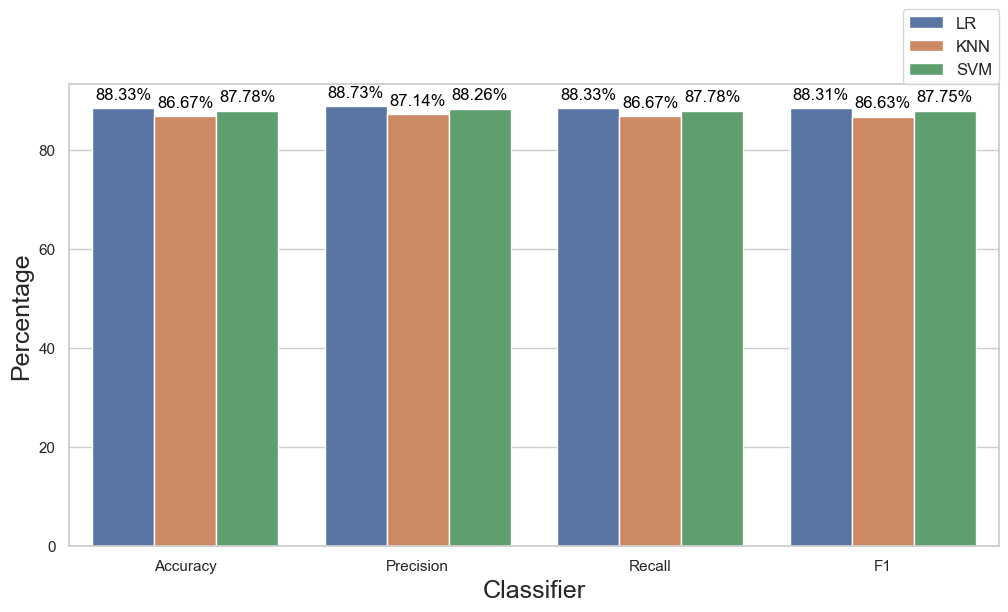

In [699]:
# Veriyi düzenleme
metrics_results = pd.melt(metrics_df_percentage, ignore_index=False).reset_index().rename(columns={'index': 'Classifier', 'variable': 'Metric', 'value': 'Percentage'})

# Çubuk grafik oluşturma
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=metrics_results, x='Classifier', y='Percentage', hue='Metric')

# Eksen etiketleri ve font boyutları
ax.set_xlabel('Classifier', fontsize=18)
ax.set_ylabel('Percentage', fontsize=18)

# Yüzdelik değerleri çubukların üzerine ekleme
for p in ax.patches:
    if p.get_height() > 0.001:  # Eşik değeri burada belirlenir
        ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                    textcoords='offset points')


# Legend'ı sağ üst köşeye yerleştirme
plt.legend(loc='lower right', bbox_to_anchor=(1, 1), borderaxespad=0, fontsize=12)

# Grafik gösterme
plt.show()
